<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Statistics with Python

---

# Housekeeping

- Unit 2 material released. Assignments to be handed in by start of class on **Monday, 16th June**.

- Project lightning talks are also on **Monday, 16th June**: prepare 5 minutes max, present 2 ideas

- Should include a problem statement, a hypothesis, and potential data sets

- Submit slides ahead of class.

- if you're struggling for ideas, talk to us!

## Learning Objectives



- Describe important summary statistics
- Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, and standard deviation
- Create appropriate visualisations for descriptive statistics: box plots and histograms
- Describe characteristics of a dataset using visualisation and summary statistics
- Identify a normal distribution within a dataset using summary statistics and data visualisations
- Look at correlation and causation


# What is the purpose of statistics?

- describe some numerical attributes of a dataset

- tell you something about a **population** from a **sample**

- find associations between things in the world

- gives you tools to analyse how much you should trust your findings

- ultimately: **explain variance**

### Descriptive Statistics

- what are the **attributes** of this dataset?
    - shape
    - centrality
    - spread

### Statistics for Inference

- what does this data tell me about the wider world?
    - associations between variables
    - differences between samples

- using the scientific method to conduct rigorous analysis

### Today: how do I describe my dataset?

We've already looked at calculating some basic statistical measures, so let's talk about them.

# Centrality

Often you want a "centre point", a "typical value" of your dataset

What are the three measures of centrality?

## Mean

- answers "what is the *typical* value in my data"?

- typically what we are thinking when we hear "average"

- just add up your numbers and divide by the count

In [1]:
import numpy as np

numbers = [1, 5, 2, 7, 3, 6, 9, 7, 4, 2]

print(np.mean(numbers))

4.6


## Median

- answers "what is the value under/above which is 50% of my data"?

- requires data to be sorted

- then take the centre point, or the mean of the two centre points if there are an even number of values

In [2]:
import numpy as np

numbers = [1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9]

print(np.median(numbers))

5.0


## Mode

- also answers "what is the most typical value in my dataset?" but typically for **categorical** values

- it's literally "the most frequently occurring value"

- what is the mode of these numbers? 1, 2, 3, 4, 4, 4, 5, 6, 7, 7, 7, 8?

- a dataset can have between 0 and infinite modes!

In [3]:
from scipy import stats

numbers = [1, 2, 6, 6, 6, 6, 6, 6, 6, 6, 8]

mode, count = stats.mode(numbers)
print(type(mode), type(count))
print(mode, count)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[6] [8]


## Mean vs. Median

Why use one or the other?

### Median over mean

- median is **resistant to outliers**

Imagine this dataset:

1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9

The mean and median are both 5.

Now imagine the 9 becomes 29.

1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 29

The mean is now 6.8, but the median is still 5.

Now imagine the 9 becomes 999.

1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 999

The mean is now **95**, but the median is still 5.

Why should we care?

Why should we care?

- outliers may or may not be valid

- they could be input errors

- they may be "special cases" that you don't want to include in your summary

- e.g. "median household income" to exclude billionaries who are "atypical"

### Mean over median

### Mean over median

If the median is more robust and resistant to outliers... why do we **ever** use the mean?

- performance (sorting is slow on millions/billions of data points)

- when you compare differences between two groups, the median may not show a difference and the mean might, and the difference *may* be meaningful

- legacy (regression, standard deviation, and other tools still rely on it - sorry!)

# Spread

What are some measures of "spread"?

# Standard deviation

- a measure of how far on average our values are from the mean

- the higher the standard deviation, the more spread out our data is

- the unit of standard deviation is the same as the original data

### Formula

$$ standard\ deviation = \sigma = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

Why the $n - 1$?

Using `n-1` is a correction for the fact that using `n` actually **underestimates** our standard deviation

For samples we historically use `n-1`, but if you have the entire population you'd use `n`

But for big data where `n` is millions, it rarely makes a difference

In [4]:
import numpy as np
import pandas as pd

numbers = [1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9]

print(np.std(numbers)) # n

x = pd.Series(numbers)

print(x.std()) # n-1

print(np.std(numbers, ddof=1)) # use n-1

2.335496832484569
2.449489742783178
2.449489742783178


### Variance

$$variance = \sigma^2 = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$


- units are in "your thing squared", less intuitive

- computationally more efficient (don't need to calculate square root)

- for summary stats, use the standard deviation

## Inter-quartile range

- the difference between the 75th percentile and the 25th percentile

- the range of the "middle 50%" of your data

- like the standard deviation, the higher the IQR the more spread out your data

- like the median, it is robust to outliers

In [5]:
from scipy import stats

numbers = [1, 2, 3, 4, 5, 5, 5, 6, 7, 8]

print(stats.iqr(numbers))

2.5


In [6]:
import numpy as np

pct75 = np.percentile(numbers, 75)
pct25 = np.percentile(numbers, 25)

iqr = pct75 - pct25
print(iqr)

2.5


In [7]:
import numpy as np

pct25, pct75 = np.percentile(numbers, [25, 75])
iqr = pct75 - pct25
print(iqr)

2.5


# The problem with numbers

Why should we not rely on summary statistics alone?

- remember Anscombe's quartet

- too much information lost

## Visualising summary statistics

### Histograms

Histograms let us visualise the **distribution** of our values, rather than summarising them into single statistics.

![](assets/images/histogram.png)

Histograms in Python:

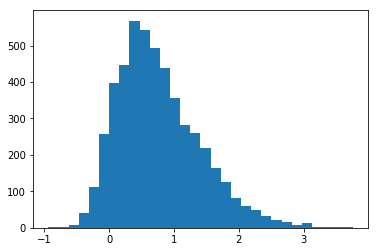

In [8]:
import matplotlib.pyplot as plt

from scipy.stats import skewnorm

%matplotlib inline

r = skewnorm.rvs(4, size=5000, random_state=42)

plt.hist(r, bins=30)

plt.show()

### Box plots

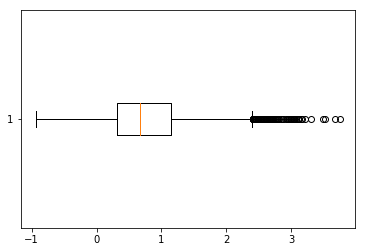

In [9]:
plt.boxplot(r, vert=False)
plt.show()

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1)
- 50% = second quartile (Q2) = median
- 75% = third quartile (Q3)
- max = maximum value

Outliers are $1.5 \times IQR$ away from either Q1 or Q3

# The Normal Distribution

The normal (or "Gaussian") distribution is one of the most common in nature.

A lot of our predictive models assume our data is Gaussian. We'll talk about that assumption later...

It depends on a **mean** and **standard deviation**

![](assets/images/normal.png)

![](assets/images/normal_with_std.png)

### Why is it important?

- comes up **a lot** in nature

- a very good assumption/simplification in a lot of statistical models

- most importantly... the Central Limit Theorem

## Central Limit Theorem

Says that aggregate processes (e.g. means of samples) are normally distributed **even if the values themselves aren't**

Let's simulate this!

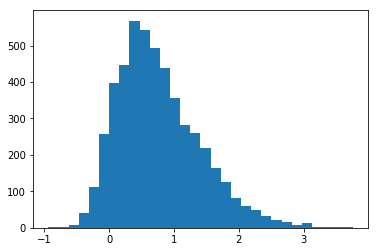

In [10]:
plt.hist(r, bins=30)
plt.show()

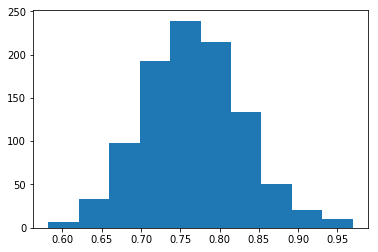

In [11]:
import numpy as np

sample_means = []

np.random.seed(42)

for _ in range(1000):
    sample = np.random.choice(r, 100)
    sample_means.append(np.mean(sample))

plt.hist(sample_means)
plt.show()

In [12]:
print(np.mean(r))
print(np.mean(sample_means))

0.7679584554196629
0.7655734755817047


We'll come back to this again, but for now just know that the normal distribution is important!

## Deviations from the normal: skew

![](assets/images/skewness.jpg)

Why is skew a bad thing?

As we mentioned before, many models assume a normal distribution and skewed datasets don't conform

In [13]:
from scipy import stats

print(stats.skew(sample_means))
print(stats.skew(r))

0.1945125476625997
0.7999609095145486


Can also be identified by plotting!

What can we do about skew?

You can transform your data, e.g. by taking the log or the square root

0.7999609095145486
-1.50616158140982


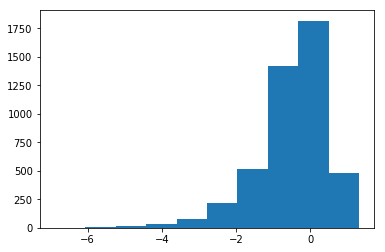

In [14]:
print(stats.skew(r))
log_r = np.log(r[r > 0])
plt.hist(log_r)
print(stats.skew(log_r))

0.7999609095145486
0.07875556425780608


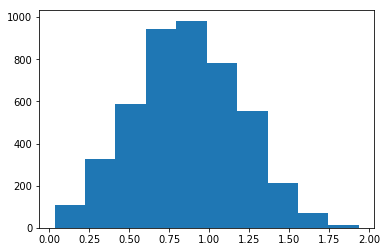

In [15]:
print(stats.skew(r))
sqrt_r = np.sqrt(r[r > 0])
plt.hist(sqrt_r)
print(stats.skew(sqrt_r))

Just remember that if you use this transformed variable, you need to interpret it differently!

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

#####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.